<a href="https://colab.research.google.com/github/j77king/VENAS/blob/master/CMPSC_310_Activity8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 8: Classification Example**

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])




Opened the dataset mnist, which is a set of 70,000 images of handwritten images. The dataset comes from openml. Then, the keys of the dataset are printed



In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

We are looking at the data and target and assigning them to x and y. The data is a tuple (made as a numpy array). Then, we retrun the shape of the data (there are 70,000 images with 784 features).

In [4]:
y.shape

(70000,)

We also took the shape of the y array. It has 70,000 images and that is it.

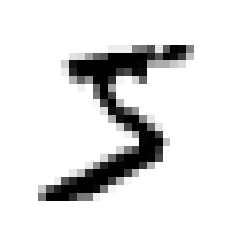

In [14]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Here, we are using matplotlib to display the image. The function takes image data and reshapes it to a 28x28 square and plots it. This function is tested with the first value in the sequence.

In [6]:
y = y.astype(np.uint8)

astype is a numpy method that takes the array and turns it into a speciic datatype (integers here)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Here we are assigning our training and test sets (60,000 training points and 10,000 testing points)

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

This is compiling all of the data points that are 5

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

We are using SGDClassifier as our learning model. It is a good choice for when you are online training data (not all at one time). The fit function is for training (predict is for testing)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

This uses the sgd algorithm we just made to predict the value of our some_digit, which is a 5, so it says true, which is correct.

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Here we are using cross validation to evaluate our sgd classification model. We are doing three splits on our data and scoring for accuracy.

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

This is similar to the block above, but instead of getting accuracy numbers, we get prediction values.

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Here, we are making a confusion matrix. We want the left to right downward diagonal to be large numbers and the upwarfd diagonal to be close to 0

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

This is what the matrix would look like if we perfectly predicted the data

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846